# **Evaluating the OCED Transit Report Data**
**By: Ayemhenre Isikhuemhen**  
**September 12, 2025**

**File Descirption:** This a jupyter notebook file used to store and organize the code used during my project using data collefected from the OECD's annual transit report in order to learn and gain insight about how we move goods and people.

## Preprocessing Data
Setting up the code prerequistes, loading the data and processing it to be ready for data mining.

In [2]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Imported")

Libraries Imported


In [3]:
# FilePath Fields: To easily access the data files downloaded from the OECD's website. To run on a machine, file paths may need to be changed.
trends_data = pd.read_csv(r"C:\Users\Owner\Downloads\Data\Annual Transit Data\OECD.ITF,DSD_TRENDS@DF_TRENDS,1.0+.A.FREIGHT.....csv")

frieght_data = pd.read_csv(r"C:\Users\Owner\Downloads\Data\Annual Transit Data\OECD.ITF,DSD_TRENDS@DF_TRENDSFREIGHT,1.0+.A......csv")
container_data = pd.read_csv(r"C:\Users\Owner\Downloads\Data\Annual Transit Data\OECD.ITF,DSD_TRENDS@DF_TRENDSCONT,1.0+.A......csv")
passenger_data = pd.read_csv(r"C:\Users\Owner\Downloads\Data\Annual Transit Data\OECD.ITF,DSD_TRENDS@DF_TRENDSPASS,1.0+.A......csv")

incidents_data = pd.read_csv(r"C:\Users\Owner\Downloads\Data\Annual Transit Data\OECD.ITF,DSD_TRENDS@DF_TRENDSSAFETY,1.0+.A...ROAD...csv")

length_data = pd.read_csv(r"C:\Users\Owner\Downloads\Data\Annual Transit Data\OECD.ITF,DSD_TRENDS@DF_TRENDSINFR,1.0+.A......csv")

print("File Paths Read")

File Paths Read


**trends_data:** Used in the transit trends report using a combined measure of freight tonnes to kilometers.  
**frieght_data:** The dataset tracks all forms of cargo referred to as freight and its distribution.  
**container_data:** Dataset specifically tracking the movement of containers (industrial metal box) for the movement of goods.   
**passenger_data:** Dataset showing trends in the movement of the passenger volume with transit.   
**incidents_data:** Dataset linked to a report focusing on total fatalities and injuries that have occurred as a result of transit.  
**length_data:** Shows the length of infrastructure implemented.  

In [4]:
# clean_dataframe: Datafiltering method, ensuring that data is clean, with no duplicates or null values. Renamed Fields
def clean_dataframe(df):
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Remove Nulls (rows where all values are null)
    df = df.dropna(how="all")
    
    # Rename/Standardize column names
    rename_map = {
        "STRUCTURE": "MODE",
        "STRUCTURE_NAME": "MODE_NAME", 
        "REF_AREA": "COUNTRY",
        "TIME": "YEAR",
        "OBS_VALUE": "VALUE",
        "Value": "VALUE"
    }
    df = df.rename(columns=rename_map)
    
    return df

# Cleaning each data file/ now dataframe
trends_df = clean_dataframe(trends_data)
freight_df = clean_dataframe(frieght_data)
container_df = clean_dataframe(container_data)
passenger_df = clean_dataframe(passenger_data)
incidents_df = clean_dataframe(incidents_data)
length_df = clean_dataframe(length_data)

print("Dataframes Cleaned")

Dataframes Cleaned


In [5]:
#Combined Dataset

# Labeling to keep track of where records come from
trends_df["dataset"] = "trends"
freight_df["dataset"] = "freight"
container_df["dataset"] = "container"
passenger_df["dataset"] = "passenger"
incidents_df["dataset"] = "incidents"
length_df["dataset"] = "length"

# Combined Set
transit_dc = pd.concat([trends_df, freight_df, container_df, passenger_df, incidents_df, length_df], ignore_index=True )
    # ignoring the index to expand the total number of rows

print("Dataframes combined into transit data collection")

Dataframes combined into transit data collection


## General Investigation
This is where we use the data to answer some of the more general questions about transit trends.

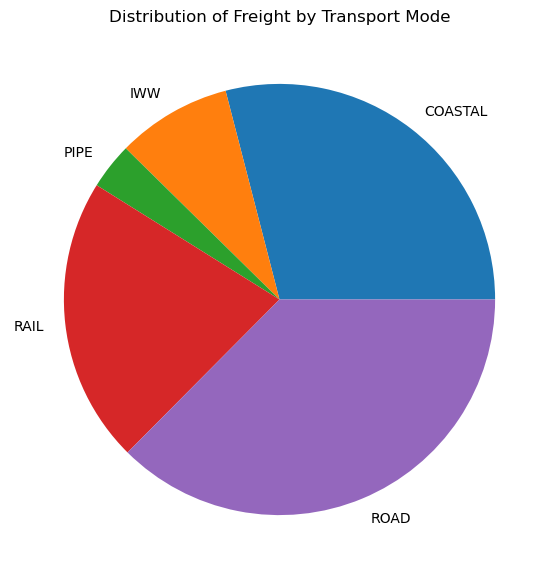

FREIGHT TRANSPORT BY MODE
Mode         Description                         Freight Volume  Percentage
--------------------------------------------------------------------------------
COASTAL      Coastal shipping (short sea routes) 48,205,026         29.0%
IWW          Inland waterways (rivers, canals)   14,300,911          8.6%
PIPE         Pipeline transport (oil, gas)        5,770,806          3.5%
RAIL         Railway transport (freight trains)  35,617,501         21.4%
ROAD         Road transport (trucks, lorries)    62,191,957         37.4%
--------------------------------------------------------------------------------
TOTAL                                            166,086,201        100.0%


In [6]:
# 1) Distribution of global transit modes by Freight: Pie Chart
# Output: Piechart showing the much each transit mode makes up global transit activities.

# Collecting and Filtering Transit Modes
freight_summary = freight_df[freight_df['VALUE'].notna()].groupby('TRANSPORT_MODE')['VALUE'].sum()
freight_summary = freight_summary.drop(['TOT_INL'], errors='ignore') # Dropping Total Inland (Skews Dataset)
freight_summary = freight_summary.drop(['HIRING'], errors='ignore') # Dropping Hiring (doesn't tell us anything about transit mode)
freight_summary = freight_summary.drop(['OWN'], errors='ignore' )# Dropping OWN (doesn't tell us anything about transit mode)


# Modes and Values for Chart
transport_modes = freight_summary.index.tolist()
freight_values = freight_summary.values.tolist()

# ====== Ploting Pie Chart ======
fig = plt.figure(figsize=(10, 7))
plt.pie(freight_values, labels=transport_modes)

plt.title('Distribution of Freight by Transport Mode')

plt.show()

# ====== Pie Chart Table ======

# Mode Descriptions
mode_descriptions = {
    'ROAD': 'Road transport (trucks, lorries)',
    'RAIL': 'Railway transport (freight trains)', 
    'IWW': 'Inland waterways (rivers, canals)',
    'PIPE': 'Pipeline transport (oil, gas)',
    'COASTAL': 'Coastal shipping (short sea routes)',
    'MAR': 'Maritime transport (ocean shipping)'
}

# Create and display table
print("=" * 80)
print("FREIGHT TRANSPORT BY MODE")
print("=" * 80)
print(f"{'Mode':<12} {'Description':<35} {'Freight Volume':<15} {'Percentage'}")
print("-" * 80)

total_freight = freight_summary.sum()

for mode in freight_summary.index:
    value = freight_summary[mode]
    percentage = (value / total_freight) * 100
    description = mode_descriptions.get(mode, 'Unknown transport mode')
    print(f"{mode:<12} {description:<35} {value:>10,.0f} {percentage:>12.1f}%")

print("-" * 80)
print(f"{'TOTAL':<48} {total_freight:>10,.0f} {100.0:>12.1f}%")
print("=" * 80)



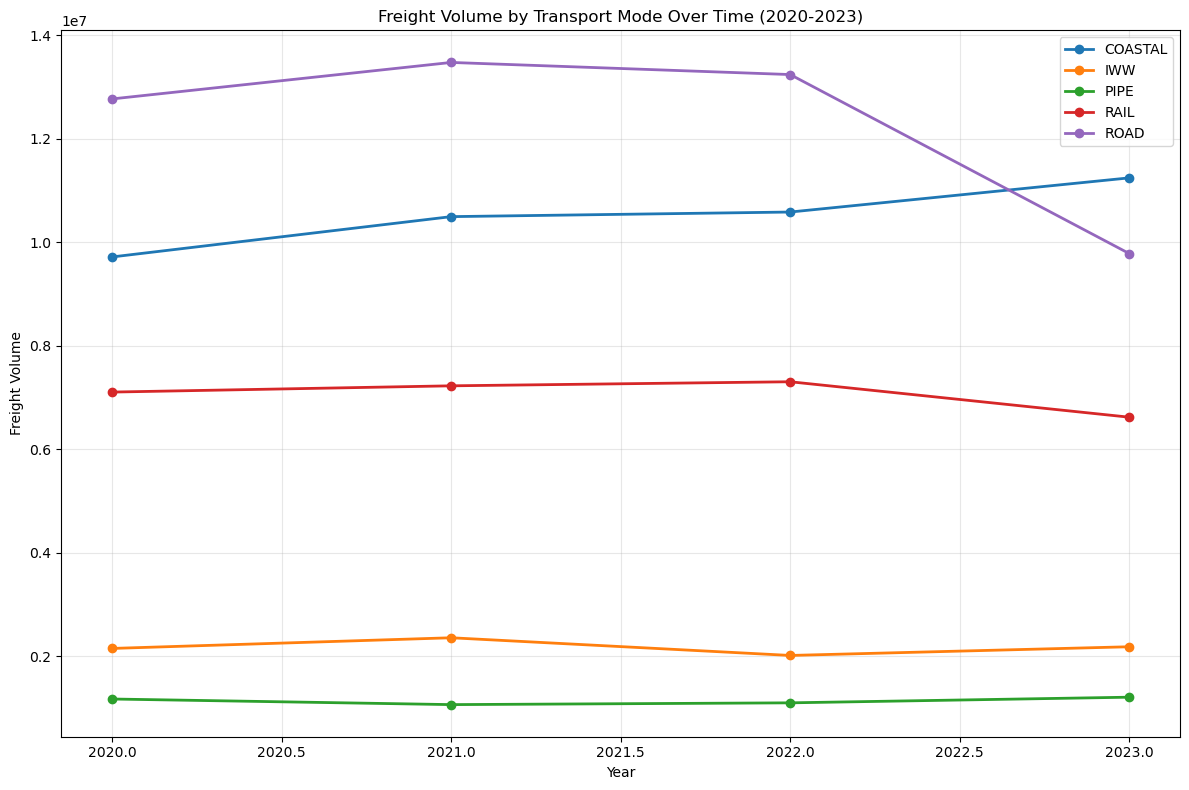


FREIGHT VOLUME TRENDS BY TRANSPORT MODE (2020-2023)

Data shape after time filtering: (931, 29)
Years available: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Transport modes available: ['IWW' 'COASTAL' 'TOT_INL' 'RAIL' 'ROAD' 'OWN' 'HIRING' 'PIPE']


COASTAL - Coastal shipping (short sea routes)
------------------------------------------------------------
  2020:  9,713,726
  2021: 10,491,930
  2022: 10,580,710
  2023: 11,240,357
  Trend: +15.7% change from 2020 to 2023

IWW - Inland waterways (rivers, canals)
------------------------------------------------------------
  2020:  2,151,650
  2021:  2,357,788
  2022:  2,016,160
  2023:  2,183,973
  Trend: +1.5% change from 2020 to 2023

PIPE - Pipeline transport (oil, gas)
------------------------------------------------------------
  2020:  1,174,774
  2021:  1,066,527
  2022:  1,100,803
  2023:  1,209,908
  Trend: +3.0% change from 2020 to 2023

RAIL - Railway transport (freight trains)
----------------------------

In [7]:
# 2) Transit Mode and Freight Volume Over Time: Line Graph
# Output: Line graph with different lines representing the different transit modes. Showing the amount of frieght moved over the time period (2020-23)

# ====== Data Collection and Filtering ======

# Collecting and Filtering data for Timeline (2020-23)
freight_time_data = freight_df[(freight_df['VALUE'].notna()) & (freight_df['TIME_PERIOD'] >= 2020) & (freight_df['TIME_PERIOD'] <= 2023)].copy()

# Grouping by year and transport mode (sum the values)
freight_by_year_mode = freight_time_data.groupby(['TIME_PERIOD', 'TRANSPORT_MODE'])['VALUE'].sum().unstack('TRANSPORT_MODE', fill_value=0)

# Remove aggregate/summary categories
columns_to_drop = ['TOT_INL', 'HIRING', 'OWN'] 

for col in columns_to_drop: 
    if col in freight_by_year_mode.columns: freight_by_year_mode = freight_by_year_mode.drop(col, axis=1)

# ====== Plotting Line Graph ======
fig = plt.figure(figsize=(12, 8))

for mode in freight_by_year_mode.columns:
    plt.plot(freight_by_year_mode.index, freight_by_year_mode[mode], marker='o', linewidth=2, label=mode)

plt.title('Freight Volume by Transport Mode Over Time (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Freight Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ====== Summary Table ======

# Mode Descriptions
mode_descriptions = {
    'ROAD': 'Road transport (trucks, lorries)',
    'RAIL': 'Railway transport (freight trains)', 
    'IWW': 'Inland waterways (rivers, canals)',
    'PIPE': 'Pipeline transport (oil, gas)',
    'COASTAL': 'Coastal shipping (short sea routes)'
}

# Dataset Notes
print("\n" + "=" * 100)
print("FREIGHT VOLUME TRENDS BY TRANSPORT MODE (2020-2023)")
print("=" * 100)

print()
print(f"Data shape after time filtering: {freight_time_data.shape}")
print(f"Years available: {sorted(freight_time_data['TIME_PERIOD'].unique())}")
print(f"Transport modes available: {freight_time_data['TRANSPORT_MODE'].unique()}")
print()

# Create summary showing trend for each mode
for mode in freight_by_year_mode.columns:
    if mode in mode_descriptions:
        print(f"\n{mode} - {mode_descriptions[mode]}")
        print("-" * 60)
        for year in freight_by_year_mode.index:
            value = freight_by_year_mode.loc[year, mode]
            print(f"  {year}: {value:>10,.0f}")
        
        # Calculate trend
        if len(freight_by_year_mode.index) > 1:
            start_value = freight_by_year_mode.iloc[0][mode]
            end_value = freight_by_year_mode.iloc[-1][mode]
            if start_value > 0:
                change_pct = ((end_value - start_value) / start_value) * 100
                print(f"  Trend: {change_pct:+.1f}% change from {freight_by_year_mode.index[0]} to {freight_by_year_mode.index[-1]}")

print("=" * 100)


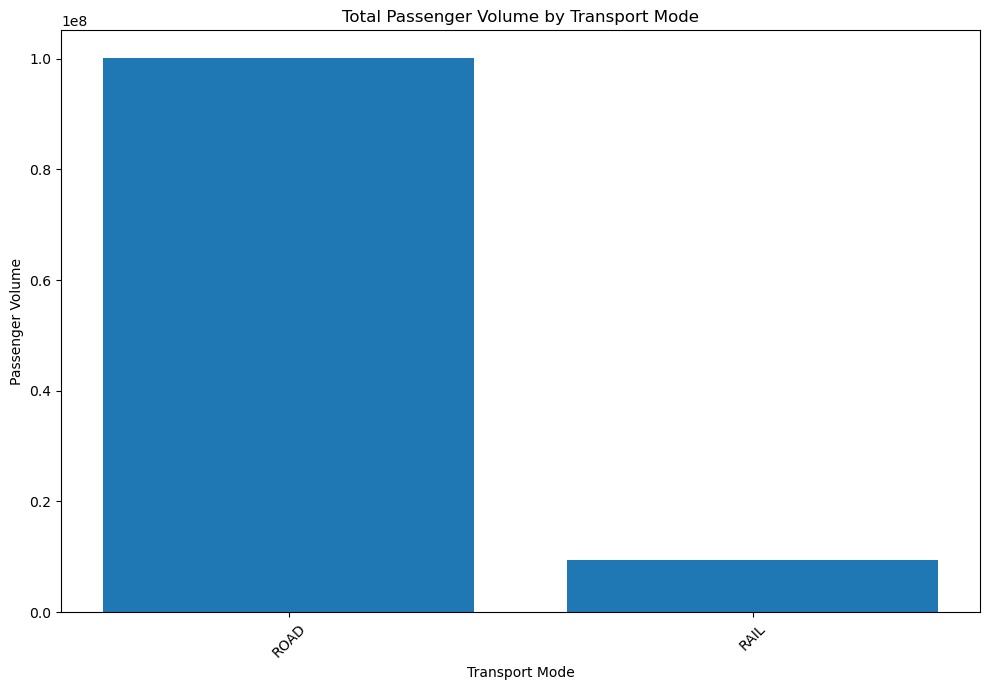


PASSENGER TRANSPORT BY MODE

Data shape: (614, 29)
Transport modes available: ['ROAD' 'RAIL']

Mode         Description                         Passenger Volume   Percentage
--------------------------------------------------------------------------------
ROAD         Road transport (buses, cars)          100,126,073         91.4%
RAIL         Railway transport (passenger trains)     9,411,816          8.6%
--------------------------------------------------------------------------------
TOTAL                                              109,537,889        100.0%


In [8]:
# 3) Transit Mode to Passenger Volume: Bar Graph
# Output: Bar Chart showing the total number of passengers moved per transit mode

# 3) Transit Mode to Passenger Volume: Bar Graph
# Output: Bar Chart showing the total number of passengers moved per transit mode

# ====== Data Collection and Filtering ======
# Collecting and Filtering Passenger Data
passenger_summary = passenger_df[passenger_df['VALUE'].notna()].groupby('TRANSPORT_MODE')['VALUE'].sum()
# Remove aggregate/summary categories (if any exist in passenger data)
columns_to_drop = ['TOT_INL', 'HIRING', 'OWN']
for col in columns_to_drop:
    if col in passenger_summary.index: passenger_summary = passenger_summary.drop(col, errors='ignore')

# Sort by values for better visualization
passenger_summary = passenger_summary.sort_values(ascending=False)

# Modes and Values for Chart
transport_modes = passenger_summary.index.tolist()
passenger_values = passenger_summary.values.tolist()

# ====== Plotting Bar Chart ======
fig = plt.figure(figsize=(10, 7))
plt.bar(transport_modes, passenger_values)
plt.title('Total Passenger Volume by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Passenger Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ====== Summary Table ======
# Mode Descriptions
mode_descriptions = {
    'ROAD': 'Road transport (buses, cars)',
    'RAIL': 'Railway transport (passenger trains)'
}

print("\n" + "=" * 80)
print("PASSENGER TRANSPORT BY MODE")
print("=" * 80)

print()
print(f"Data shape: {passenger_df[passenger_df['VALUE'].notna()].shape}")
print(f"Transport modes available: {passenger_df['TRANSPORT_MODE'].unique()}")
print()

print(f"{'Mode':<12} {'Description':<35} {'Passenger Volume':<18} {'Percentage'}")
print("-" * 80)

total_passengers = passenger_summary.sum()
for mode in passenger_summary.index:
    value = passenger_summary[mode]
    percentage = (value / total_passengers) * 100
    description = mode_descriptions.get(mode, 'Unknown transport mode')
    print(f"{mode:<12} {description:<35} {value:>13,.0f} {percentage:>12.1f}%")

print("-" * 80)
print(f"{'TOTAL':<48} {total_passengers:>13,.0f} {100.0:>12.1f}%")
print("=" * 80)

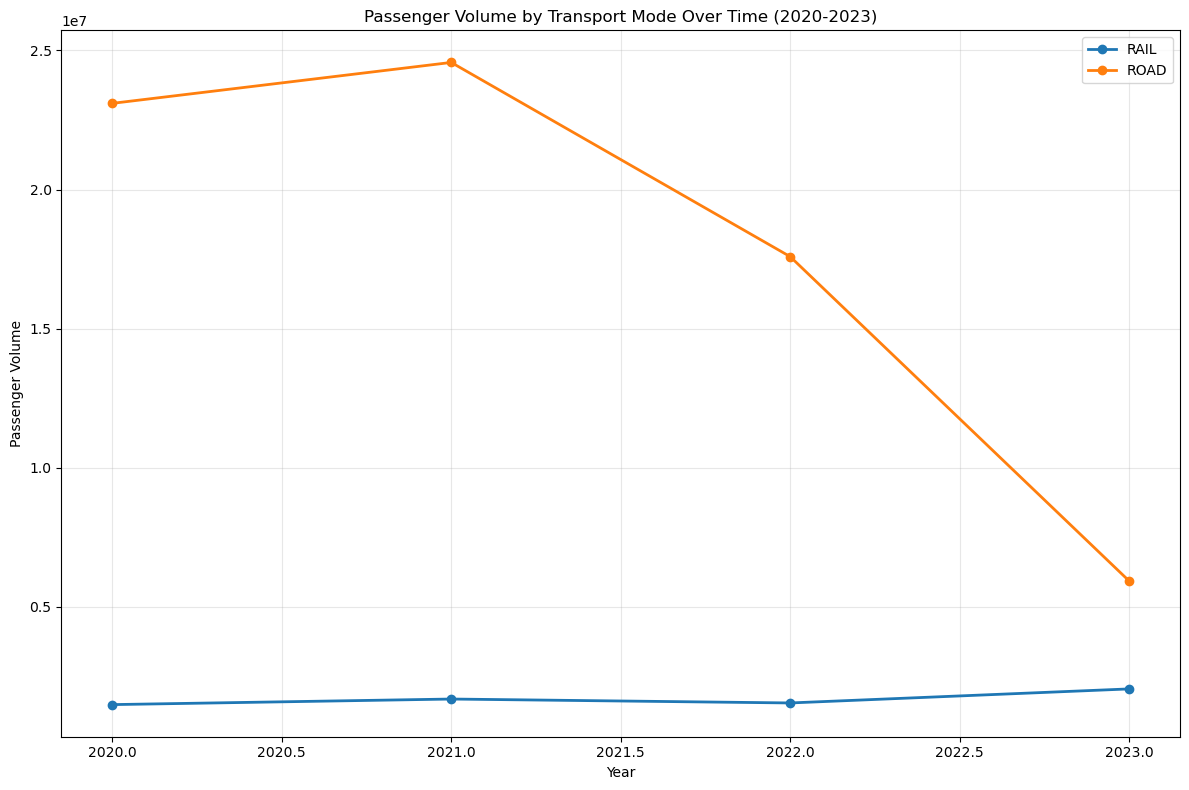


PASSENGER VOLUME TRENDS BY TRANSPORT MODE (2020-2023)

Data shape after time filtering: (474, 29)
Years available: [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Transport modes available: ['ROAD' 'RAIL']


RAIL - Railway transport (passenger trains)
------------------------------------------------------------
  2020:  1,482,877
  2021:  1,683,503
  2022:  1,542,438
  2023:  2,047,429
  Trend: +38.1% change from 2020 to 2023

ROAD - Road transport (buses, cars)
------------------------------------------------------------
  2020: 23,097,246
  2021: 24,568,011
  2022: 17,586,963
  2023:  5,927,252
  Trend: -74.3% change from 2020 to 2023


In [9]:
# 4) Transit Mode to Passenger Volume Over Time: Line Graph
# Output: Line graph with different lines representing the different transit modes. Showing the amount of passengers moved over the time period (2020-23)

# ====== Data Collection and Filtering ======
# Collecting and Filtering data for Timeline (2020-23)
passenger_time_data = passenger_df[(passenger_df['VALUE'].notna()) & (passenger_df['TIME_PERIOD'] >= 2020) & (passenger_df['TIME_PERIOD'] <= 2023)].copy()
# Grouping by year and transport mode (sum the values)
passenger_by_year_mode = passenger_time_data.groupby(['TIME_PERIOD', 'TRANSPORT_MODE'])['VALUE'].sum().unstack('TRANSPORT_MODE', fill_value=0)
# Remove aggregate/summary categories
columns_to_drop = ['TOT_INL', 'HIRING', 'OWN'] 
for col in columns_to_drop: 
    if col in passenger_by_year_mode.columns: passenger_by_year_mode = passenger_by_year_mode.drop(col, axis=1)

# ====== Plotting Line Graph ======
fig = plt.figure(figsize=(12, 8))
for mode in passenger_by_year_mode.columns:
    plt.plot(passenger_by_year_mode.index, passenger_by_year_mode[mode], marker='o', linewidth=2, label=mode)
plt.title('Passenger Volume by Transport Mode Over Time (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Passenger Volume')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ====== Summary Table ======
# Mode Descriptions
mode_descriptions = {
    'ROAD': 'Road transport (buses, cars)',
    'RAIL': 'Railway transport (passenger trains)', 
    'IWW': 'Inland waterways (passenger boats)'
}
# Dataset Notes
print("\n" + "=" * 100)
print("PASSENGER VOLUME TRENDS BY TRANSPORT MODE (2020-2023)")
print("=" * 100)

print()
print(f"Data shape after time filtering: {passenger_time_data.shape}")
print(f"Years available: {sorted(passenger_time_data['TIME_PERIOD'].unique())}")
print(f"Transport modes available: {passenger_time_data['TRANSPORT_MODE'].unique()}")
print()

# Create summary showing trend for each mode
for mode in passenger_by_year_mode.columns:
    if mode in mode_descriptions:
        print(f"\n{mode} - {mode_descriptions[mode]}")
        print("-" * 60)
        for year in passenger_by_year_mode.index:
            value = passenger_by_year_mode.loc[year, mode]
            print(f"  {year}: {value:>10,.0f}")
        
        # Calculate trend
        if len(passenger_by_year_mode.index) > 1:
            start_value = passenger_by_year_mode.iloc[0][mode]
            end_value = passenger_by_year_mode.iloc[-1][mode]
            if start_value > 0:
                change_pct = ((end_value - start_value) / start_value) * 100
                print(f"  Trend: {change_pct:+.1f}% change from {passenger_by_year_mode.index[0]} to {passenger_by_year_mode.index[-1]}")
print("=" * 100)

In [12]:
# 5) Incidents to Transit Mode: Bar Graph
# Output: Bar Chart showing the total number of Incidents (Injuries and Fatalities) moved per transit mode

# ====== Summary Table ======
# Mode Descriptions
mode_descriptions = {
    'ROAD': 'Road transport (cars, trucks, buses)',
    'RAIL': 'Railway transport (trains)', 
    'IWW': 'Inland waterways (boats)',
    'PIPE': 'Pipeline transport',
    'COASTAL': 'Coastal shipping',
    'MAR': 'Maritime transport',
    'AIR': 'Air transport'
}

incidents_summary = incidents_df[incidents_df['VALUE'].notna()].groupby('TRANSPORT_MODE')['VALUE'].sum()

print("\n" + "=" * 80)
print("INCIDENTS BY TRANSPORT MODE")
print("=" * 80)
print()
print(f"Data shape: {incidents_df[incidents_df['VALUE'].notna()].shape}")
print(f"Transport modes available: {incidents_df['TRANSPORT_MODE'].unique()}")
print(f"Incident types available: {incidents_df['MEASURE'].unique()}")
print()
print(f"{'Mode':<12} {'Description':<35} {'Total Incidents':<18} {'Percentage'}")
print("-" * 80)

total_incidents = incidents_summary.sum()
for mode in incidents_summary.index:
    value = incidents_summary[mode]
    percentage = (value / total_incidents) * 100
    description = mode_descriptions.get(mode, 'Unknown transport mode')
    print(f"{mode:<12} {description:<35} {value:>10,.0f} {percentage:>12.1f}%")

print("-" * 80)
print(f"{'TOTAL':<48} {total_incidents:>10,.0f} {100.0:>12.1f}%")
print("=" * 80)


INCIDENTS BY TRANSPORT MODE

Data shape: (677, 29)
Transport modes available: ['ROAD']
Incident types available: ['FATALITIES' 'INJURED' 'CRASHES']

Mode         Description                         Total Incidents    Percentage
--------------------------------------------------------------------------------
ROAD         Road transport (cars, trucks, buses) 47,180,211        100.0%
--------------------------------------------------------------------------------
TOTAL                                            47,180,211        100.0%


In [ ]:
# 6) Country Transit Mode Dependency: Heatmap
# Output: Displays a heatmap showing how dependent each country is on each transit mode.

# ====== Data Collection and Filtering ======
# Using freight data to show dependency (could also use combined transit_dc)
country_mode_data = freight_df[freight_df['VALUE'].notna()].copy()

# Remove aggregate/summary categories
country_mode_data = country_mode_data[~country_mode_data['TRANSPORT_MODE'].isin(['TOT_INL', 'HIRING', 'OWN'])]

# Create pivot table: countries vs transport modes
heatmap_data = country_mode_data.pivot_table(index="COUNTRY", columns="TRANSPORT_MODE", values="VALUE", aggfunc="sum", fill_value=0)

heatmap_data_log = np.log1p(heatmap_data)  # log1p = log(1+x)

# ====== Plotting Heatmap ======

# Creating and displaying Heatmap
fig = plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data_log, 
            annot=False, # No Annontations to better register country differences
            cmap="Greys", 
            cbar_kws={'label': 'Log(Freight Volume + 1)'},
            linewidths=0.5)
plt.title('Country Transit Mode Dependency', fontsize=16, fontweight='bold')
plt.xlabel('Transport Mode', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

# ====== Summary Table ======
print("\n" + "=" * 100)
print("COUNTRY TRANSIT MODE DEPENDENCY")
print("=" * 100)
print()

# Data Notes
print(f"Countries: {len(heatmap_data.index)}")
print(f"Transport modes: {list(heatmap_data.columns)}")
print(f"Heatmap shape: {heatmap_data.shape}")
print(f"Original value range: {heatmap_data.min().min():.0f} to {heatmap_data.max().max():.0f}")
print(f"Log-transformed range: {heatmap_data_log.min().min():.2f} to {heatmap_data_log.max().max():.2f}")
print()

print()
print("Most used transport modes (globally):")
mode_totals = heatmap_data.sum(axis=0).sort_values(ascending=False)
for mode, total in mode_totals.items():
    print(f"{mode}: {total:,.0f}")

print("=" * 100)

In [ ]:
# 7) Goods and Passenger Transit Mode Dependency: Heatmap
# Output: Shows how dependent containers, friehgt, and passengers are on each transit mode.

# Combine freight, container, and passenger data
goods_passenger_data = pd.concat([
    freight_df[freight_df['VALUE'].notna()].assign(category='Freight'),
    container_df[container_df['VALUE'].notna()].assign(category='Container'),
    passenger_df[passenger_df['VALUE'].notna()].assign(category='Passenger')
], ignore_index=True)

# Remove aggregate/summary categories
goods_passenger_data = goods_passenger_data[~goods_passenger_data['TRANSPORT_MODE'].isin(['TOT_INL', 'HIRING', 'OWN'])]

# Create pivot table: category vs transport modes
heatmap_data = goods_passenger_data.pivot_table(index="category", columns="TRANSPORT_MODE", values="VALUE", aggfunc="sum", fill_value=0)

# Apply log transformation for better scale
heatmap_data_log = np.log1p(heatmap_data)

# ====== Plotting Heatmap ======
# Creating and displaying Heatmap
fig = plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_log, 
            annot=False, # No annotations to better register differences
            cmap="Greys", 
            cbar_kws={'label': 'Log(Volume + 1)'},
            linewidths=0.5)
plt.title('Goods and Passenger Transit Mode Dependency', fontsize=16, fontweight='bold')
plt.xlabel('Transport Mode', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# ====== Summary Table ======
print("\n" + "=" * 100)
print("GOODS AND PASSENGER TRANSIT MODE DEPENDENCY")
print("=" * 100)
print()

# Data Notes
print(f"Categories: {list(heatmap_data.index)}")
print(f"Transport modes: {list(heatmap_data.columns)}")
print(f"Heatmap shape: {heatmap_data.shape}")
print(f"Original value range: {heatmap_data.min().min():.0f} to {heatmap_data.max().max():.0f}")
print(f"Log-transformed range: {heatmap_data_log.min().min():.2f} to {heatmap_data_log.max().max():.2f}")
print()
print()

print("Transport mode usage by category:")
for category in heatmap_data.index:
    print(f"\n{category.upper()} - Top modes:")
    category_data = heatmap_data.loc[category].sort_values(ascending=False)
    for mode, value in category_data.head(3).items():
        if value > 0:
            print(f"  {mode}: {value:,.0f}")
print("=" * 100)

In [ ]:
# 8) Efficiency Score: Distance of Infrastructure to Volume: Table
# Output: Provides score and ranking for each transit mode based on how many passengers and frieght is moved to the amount of infrastructure length used for it.

# ====== Data Collection and Preparation ======
print("\n" + "=" * 100)
print("EFFICIENCY SCORE RANKING: (INFRASTRUCTURE / VOLUME)")
print("=" * 100)

# ====== Infrastructure Length Data Processing ======
infrastructure_data = length_df[length_df['VALUE'].notna()].copy()

# Group by transport mode and sum the infrastructure lengths
infrastructure_summary = infrastructure_data.groupby('TRANSPORT_MODE')['VALUE'].sum()

# Remove any aggregate categories that might skew results
infrastructure_summary = infrastructure_summary.drop(['TOT_INL', 'HIRING', 'OWN'], errors='ignore')

# ====== Volume Data Processing ======
# Process freight volume data (already calculated in previous sections)
freight_volume = freight_df[freight_df['VALUE'].notna()].groupby('TRANSPORT_MODE')['VALUE'].sum()
freight_volume = freight_volume.drop(['TOT_INL', 'HIRING', 'OWN'], errors='ignore')

# Process passenger volume data (already calculated in previous sections)  
passenger_volume = passenger_df[passenger_df['VALUE'].notna()].groupby('TRANSPORT_MODE')['VALUE'].sum()
passenger_volume = passenger_volume.drop(['TOT_INL', 'HIRING', 'OWN'], errors='ignore')


# ====== Efficiency Score Calculations ======

# Find common transport modes between infrastructure and volume data
common_freight_modes = set(infrastructure_summary.index) & set(freight_volume.index)
common_passenger_modes = set(infrastructure_summary.index) & set(passenger_volume.index)

# ====== Freight Efficiency Calculation ======
# Calculate freight efficiency (tonnes per km of infrastructure)
freight_efficiency = {}
for mode in common_freight_modes:
    if infrastructure_summary[mode] > 0:  # Avoid division by zero
        efficiency = freight_volume[mode] / infrastructure_summary[mode]
        freight_efficiency[mode] = {
            'infrastructure_km': infrastructure_summary[mode],
            'freight_volume': freight_volume[mode], 
            'efficiency_score': efficiency,
            'efficiency_per_1000km': efficiency * 1000  # Scale for readability
        }

# Sort by efficiency score (highest first)
freight_efficiency_sorted = dict(sorted(freight_efficiency.items(), 
                                      key=lambda x: x[1]['efficiency_score'], 
                                      reverse=True))

# ====== Passenger Efficiency Calculation ======
# Calculate passenger efficiency (passengers per km of infrastructure)
passenger_efficiency = {}
for mode in common_passenger_modes:
    if infrastructure_summary[mode] > 0:  # Avoid division by zero
        efficiency = passenger_volume[mode] / infrastructure_summary[mode]
        passenger_efficiency[mode] = {
            'infrastructure_km': infrastructure_summary[mode],
            'passenger_volume': passenger_volume[mode],
            'efficiency_score': efficiency,
            'efficiency_per_1000km': efficiency * 1000  # Scale for readability
        }

# Sort by efficiency score (highest first)  
passenger_efficiency_sorted = dict(sorted(passenger_efficiency.items(),
                                        key=lambda x: x[1]['efficiency_score'],
                                        reverse=True))

# ====== Display Freight Efficiency Results ======
print()
print()
print("FREIGHT EFFICIENCY RANKING")
print("-" * 110)
print(f"{'Rank':<6} {'Mode':<12} {'Infrastructure (km)':<18} {'Freight Volume':<15} {'Efficiency':<15} {'Per 1000km':<15}")
print("-" * 110)

# Mode descriptions for context
mode_descriptions = {
    'ROAD': 'Road networks (highways, streets)',
    'RAIL': 'Railway lines and tracks', 
    'IWW': 'Inland waterways (rivers, canals)',
    'PIPE': 'Pipeline infrastructure',
    'COASTAL': 'Coastal shipping routes'
}

rank = 1
for mode, data in freight_efficiency_sorted.items():
    description = mode_descriptions.get(mode, 'Unknown transport mode')
    print(f"{rank:<6} {mode:<12} {data['infrastructure_km']:>13,.0f} {data['freight_volume']:>13,.0f} "
          f"{data['efficiency_score']:>13.2f} {data['efficiency_per_1000km']:>13,.0f}")
    print(f"       {description}")
    rank += 1

print("-" * 110)
print("Efficiency Score = Freight Volume (tonnes) / Infrastructure Length (km)")
print("Higher scores indicate more efficient use of infrastructure")

# ====== Display Passenger Efficiency Results ======
print()
print()
print("PASSENGER EFFICIENCY RANKING") 
print("-" * 110)
print(f"{'Rank':<6} {'Mode':<12} {'Infrastructure (km)':<18} {'Passenger Volume':<17} {'Efficiency':<15} {'Per 1000km':<15}")
print("-" * 110)

rank = 1
for mode, data in passenger_efficiency_sorted.items():
    description = mode_descriptions.get(mode, 'Unknown transport mode')
    print(f"{rank:<6} {mode:<12} {data['infrastructure_km']:>13,.0f} {data['passenger_volume']:>15,.0f} "
          f"{data['efficiency_score']:>13.2f} {data['efficiency_per_1000km']:>13,.0f}")
    print(f"       {description}")
    rank += 1

print("-" * 110)
print("Efficiency Score = Passenger Volume / Infrastructure Length (km)")

## Comparative Investigation
Here we are speficially asking how certain groups - divided by nation, geography, or other notable features comepare to each other.These visualizations will be more advance incorporating statistical analysis.

In [ ]:
# Countries with No Inland Waterways Vs Countries 

# Implermentation is Pending

In [ ]:
# Rail Heavy Country Incidents Vs  Road Heavy Countries

# Implermentation is Pending

In [ ]:
# Regional Differences: {United States, ECOWAS, European Union, China}

# Implermentation is Pending

## Growth and Crisis Investigation
Leveraging the data to visualize how certain transit modes behave under unique circumstances like the pandemic. Aswell as if a transit mode's growth led  to a higher volue of frieght movement.

In [ ]:
# Correlation between increased usage of transity mdoe and frieght volume

# Implermentation is Pending

In [ ]:
# Correlation between transit length and frieght volume

# Implermentation is Pending

## Miscellaneous
Other pieces of code for visualizations or statistical models unrelated to the three main investigations of this project.

In [ ]:
# Country to Frieght Volume: X-Chart

In [ ]:
# Country to Passenger Volume: X-Chart

In [ ]:
# Verifying transit_dc - Not super relevant just checking if dataframe works.
print("Shape")
print(transit_dc.shape)
print()
print("Column")
print(transit_dc.columns)
print()
print("Column")
print(trends_df.columns)
print()
print("Head")
print(transit_dc.head())

In [ ]:
# Dataframe Analysis: Outlining information about transit data collection and other relevatn dataframes.

print("Checking: transit_dc's Basic Stats")
print("")
print(f"Total shape: {transit_dc.shape}")
print(f"Columns: {list(transit_dc.columns)}")
print(f"Dataset distribution:")
print(transit_dc['dataset'].value_counts())
print("\n" + "="*50 + "\n") # visual seperator

print("Checking: unique values in transit_dc")
print(f"Unique MEASURE values: {transit_dc['MEASURE'].unique()}")
print(f"Count of each MEASURE: {transit_dc['MEASURE'].value_counts()}")
print()
print(f"Unique TRANSPORT_MODE values: {transit_dc['TRANSPORT_MODE'].unique()}")
print(f"Count of each TRANSPORT_MODE: {transit_dc['TRANSPORT_MODE'].value_counts()}")
print()
print(f"Unique OBS_STATUS values: {transit_dc['OBS_STATUS'].unique()}")
print(f"Count of each OBS_STATUS: {transit_dc['OBS_STATUS'].value_counts()}")
print("\n" + "="*50 + "\n")

print("Checking: For empty columns within the data collection.")
print(f"VALUE column type: {transit_dc['VALUE'].dtype}")
print(f"Non-null VALUES: {transit_dc['VALUE'].notna().sum()}")
print(f"Null VALUES: {transit_dc['VALUE'].isna().sum()}")
print(f"VALUE stats:")
print(transit_dc['VALUE'].describe())
print("\n" + "="*50 + "\n")

print("Checking: Basic Stats for each Dataframe")
for dataset_name in ['trends', 'freight', 'container', 'passenger', 'incidents', 'length']:
    # for loops are cool!
    subset = transit_dc[transit_dc['dataset'] == dataset_name]
    print(f"\n{dataset_name.upper()} DATASET:")
    print(f"  Shape: {subset.shape}")
    print(f"  Unique MEASURE values: {subset['MEASURE'].unique()}")
    print(f"  Unique TRANSPORT_MODE values: {subset['TRANSPORT_MODE'].unique()}")
    print(f"  Non-null VALUES: {subset['VALUE'].notna().sum()}")
    print("\n" + "="*30 + "\n")

print("\n" + "="*50 + "\n")

print("Checking: Freight Record Distribution across Dataframes.")
freight_subset = transit_dc[transit_dc['dataset'] == 'freight']
print(f"Freight dataset shape: {freight_subset.shape}")
print(f"Freight MEASURE values: {freight_subset['MEASURE'].unique()}")
print(f"Freight non-null VALUES: {freight_subset['VALUE'].notna().sum()}")
print("\n" + "="*50 + "\n")

print("Checking: Alternative Filtering Approaches")
# Try with freight dataset only
test1 = freight_subset[freight_subset['VALUE'].notna()]
print(f"Freight with non-null VALUES: {test1.shape[0]} rows")

if test1.shape[0] > 0:
    print(f"TRANSPORT_MODE in freight data: {test1['TRANSPORT_MODE'].unique()}")
    print(f"Sample VALUES: {test1['VALUE'].head()}")

# Orginal Dataframes
print("Original Dataframe Check")
print(f"Original freight_df shape: {freight_df.shape}")
print(f"Original freight_df columns: {list(freight_df.columns)}")
print(f"Original freight_df VALUE column exists: {'VALUE' in freight_df.columns}")
print(f"Original freight_df non-null values: {freight_df['VALUE'].notna().sum() if 'VALUE' in freight_df.columns else 'N/A'}")